In [ ]:
import os
from google.colab import files
uploaded = files.upload()
print(os.getcwd())


Saving owid-covid-data_3.csv to owid-covid-data_3 (1).csv
/content


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
from scipy import stats


dataframe1= pd.read_csv("owid-covid-data_3 (1).csv")
dataframe1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83651,ZWE,Africa,Zimbabwe,2021-04-19,37859.0,108.0,78.857,1553.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83652,ZWE,Africa,Zimbabwe,2021-04-20,37875.0,16.0,77.857,1554.0,1.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83653,ZWE,Africa,Zimbabwe,2021-04-21,37980.0,105.0,87.286,1555.0,1.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83654,ZWE,Africa,Zimbabwe,2021-04-22,38018.0,38.0,85.143,1555.0,0.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
dataframe1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83656 entries, 0 to 83655
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               83656 non-null  object 
 1   continent                              79608 non-null  object 
 2   location                               83656 non-null  object 
 3   date                                   83656 non-null  object 
 4   total_cases                            81679 non-null  float64
 5   new_cases                              81677 non-null  float64
 6   new_cases_smoothed                     80676 non-null  float64
 7   total_deaths                           72071 non-null  float64
 8   new_deaths                             72229 non-null  float64
 9   new_deaths_smoothed                    80676 non-null  float64
 10  total_cases_per_million                81237 non-null  float64
 11  ne

In [ ]:
df=dataframe1.loc[:,['iso_code', 'continent', 'location', 'date',
          'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
          'icu_patients','hosp_patients',
          'new_tests', 'total_tests',
          'total_vaccinations','people_vaccinated', 'people_fully_vaccinated','new_vaccinations','population']
      ]
print(df.head(5))

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   total_deaths  new_deaths  icu_patients  hosp_patients  new_tests  \
0           NaN         NaN           NaN            NaN        NaN   
1           NaN         NaN           NaN            NaN        NaN   
2           NaN         NaN           NaN            NaN        NaN   
3           NaN         NaN           NaN            NaN        NaN   
4           NaN         NaN           NaN            NaN        NaN   

   total_tests  total_vaccinations  people_vaccinated  \
0          NaN                 NaN                NaN   
1          NaN      

Data cleaning :-


In [ ]:
dataframe1.isna().sum().sort_values(ascending=False)
dataframe1.tail(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
83646,ZWE,Africa,Zimbabwe,2021-04-14,37369.0,39.0,55.000,1548.0,5.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83647,ZWE,Africa,Zimbabwe,2021-04-15,37422.0,53.0,52.857,1550.0,2.0,2.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83648,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83649,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83650,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83651,ZWE,Africa,Zimbabwe,2021-04-19,37859.0,108.0,78.857,1553.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83652,ZWE,Africa,Zimbabwe,2021-04-20,37875.0,16.0,77.857,1554.0,1.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83653,ZWE,Africa,Zimbabwe,2021-04-21,37980.0,105.0,87.286,1555.0,1.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83654,ZWE,Africa,Zimbabwe,2021-04-22,38018.0,38.0,85.143,1555.0,0.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83655,ZWE,Africa,Zimbabwe,2021-04-23,38045.0,27.0,73.000,1556.0,1.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
df=df[df.continent.isna()].location.unique()
print(df)


['Africa' 'Asia' 'Europe' 'European Union' 'International' 'North America'
 'Oceania' 'South America' 'World']



finding which countries population is written NAN value

In [ ]:
dataframe1[dataframe1.location.str.contains('Northern Cyprus')].info()
dataframe1[dataframe1.location.str.contains('Northern Cyprus')].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 55926 to 56025
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               100 non-null    object 
 1   continent                              100 non-null    object 
 2   location                               100 non-null    object 
 3   date                                   100 non-null    object 
 4   total_cases                            0 non-null      float64
 5   new_cases                              0 non-null      float64
 6   new_cases_smoothed                     0 non-null      float64
 7   total_deaths                           0 non-null      float64
 8   new_deaths                             0 non-null      float64
 9   new_deaths_smoothed                    0 non-null      float64
 10  total_cases_per_million                0 non-null      float64
 11  

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                              100
new_cases                                100
new_cases_smoothed                       100
total_deaths                             100
new_deaths                               100
new_deaths_smoothed                      100
total_cases_per_million                  100
new_cases_per_million                    100
new_cases_smoothed_per_million           100
total_deaths_per_million                 100
new_deaths_per_million                   100
new_deaths_smoothed_per_million          100
reproduction_rate                        100
icu_patients                             100
icu_patients_per_million                 100
hosp_patients                            100
hosp_patients_per_million                100
weekly_icu_admissions                    100
weekly_icu

In [ ]:
world_comparasion=dataframe1.groupby('location')['continent','total_cases','total_deaths','people_vaccinated','population'].max().sort_values(by='location',ascending=False).reset_index()
world_comparasion['percent_population_vaccinated']=world_comparasion['people_vaccinated']/world_comparasion['population']
world_comparasion['percent_population_death']=world_comparasion['total_deaths']/world_comparasion['population']
world_comparasion= world_comparasion.loc[world_comparasion['location'] != world_comparasion['continent']].reset_index(drop=True)
world_comparasion


<ipython-input-35-af9801dc548d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world_comparasion=dataframe1.groupby('location')['continent','total_cases','total_deaths','people_vaccinated','population'].max().sort_values(by='location',ascending=False).reset_index()


,location,continent,total_cases,total_deaths,people_vaccinated,population,percent_population_vaccinated,percent_population_death
0,Zimbabwe,Africa,38045.0,1556.0,319732.0,1.486293e+07,0.021512,1.046900e-04
1,Zambia,Africa,91251.0,1245.0,9006.0,1.838396e+07,0.000490,6.772209e-05
2,Yemen,Asia,6056.0,1165.0,NaN,2.982597e+07,NaN,3.905992e-05
3,World,NaN,145640413.0,3086150.0,542904823.0,7.794799e+09,0.069650,3.959243e-04
4,Vietnam,Asia,2830.0,35.0,176037.0,9.733858e+07,0.001809,3.595696e-07
...,...,...,...,...,...,...,...,...
214,Andorra,Europe,13007.0,123.0,21733.0,7.726500e+04,0.281279,1.591924e-03
215,Algeria,Africa,120562.0,3190.0,NaN,4.385104e+07,NaN,7.274627e-05
216,Albania,Europe,130270.0,2367.0,6073.0,2.877800e+06,0.002110,8.225033e-04
217,Africa,NaN,4487054.0,119604.0,11279624.0,1.340598e+09,0.008414,8.921689e-05


The top 8 countries (population > 10 million) have the most COVID cases

In [ ]:
country_pop_more_than_10m= world_comparasion[world_comparasion['population']>10000000]
top_8_total_cases = country_pop_more_than_10m[['location','population','total_cases']].sort_values(by='total_cases',ascending=False).reset_index(drop=True).head(8)
top_8_total_cases


,location,population,total_cases
0,World,7.794799e+09,145640413.0
1,Europe,7.486801e+08,43930132.0
2,North America,5.920722e+08,37051725.0
3,Asia,4.639847e+09,36102611.0
4,United States,3.310026e+08,31991750.0
5,European Union,4.449191e+08,30029207.0
6,South America,4.307598e+08,24025461.0
7,India,1.380004e+09,16610481.0


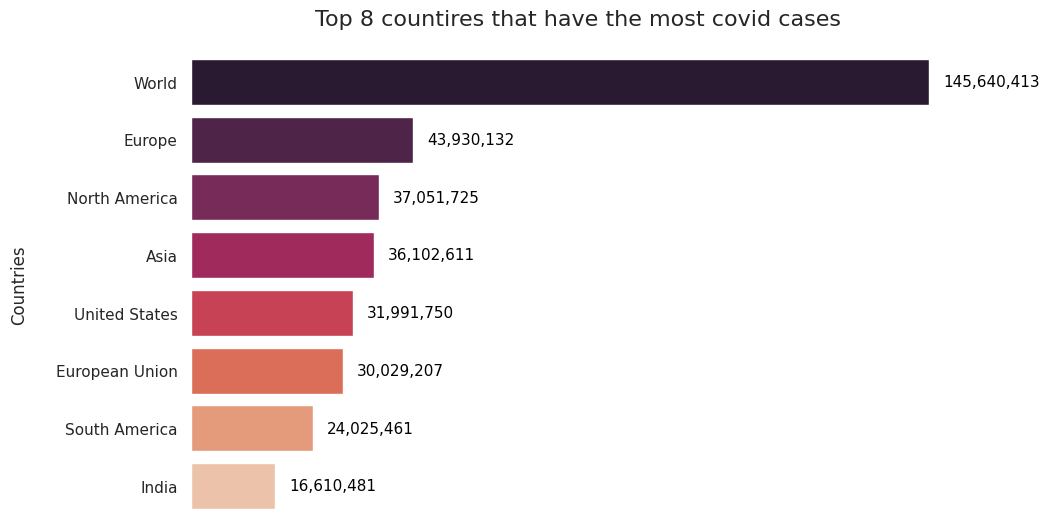

In [ ]:
sns.set_theme(style='white')
f, ax = plt.subplots(figsize=(10, 6))
ax= sns.barplot(x='total_cases' , y='location', data=top_8_total_cases, palette='rocket')
sns.despine(left=True, bottom=True)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)

ax.axes.set_title('Top 8 countires that have the most covid cases',fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Countries',fontsize=12, labelpad=20)

#set annotation
for p in ax.patches:
    ax.annotate('{:,}'.format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha='left', va='center', color='black', fontsize=11);


The top 8 European countries (with a population of more than 10 million) have the highest percentage of vaccinated citizens.

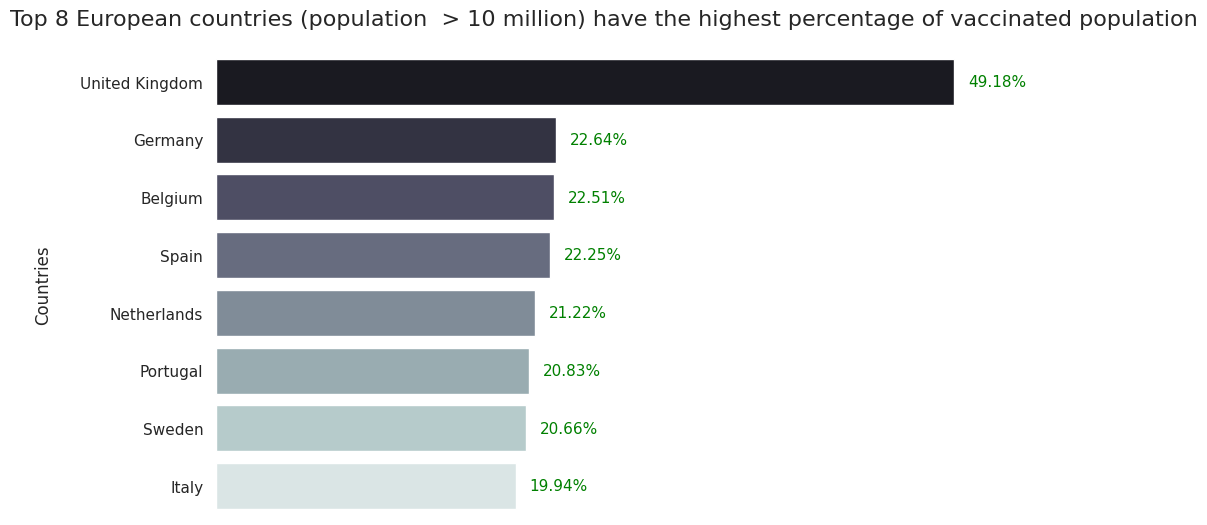

In [ ]:
top_8_percent_population_vaccinated_EU=country_pop_more_than_10m[country_pop_more_than_10m.continent=='Europe'].sort_values(by='percent_population_vaccinated', ascending=False).head(8)

sns.set_theme(style='white')
f, ax = plt.subplots(figsize=(10, 6))
ax= sns.barplot(x='percent_population_vaccinated' , y='location', data=top_8_percent_population_vaccinated_EU, palette='bone')
sns.despine(left=True, bottom=True)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)


ax.axes.set_title('Top 8 European countries (population  > 10 million) have the highest percentage of vaccinated population',fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Countries',fontsize=12, labelpad=20)

#set annotation
for p in ax.patches:
    ax.annotate('{:,.2f}%'.format(float(p.get_width())*100), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha='left', va='center', color='green', fontsize=11);



#The top 10 Asian countries (with a population of more than 10 million) have the highest percentage of vaccinated citizens. -->

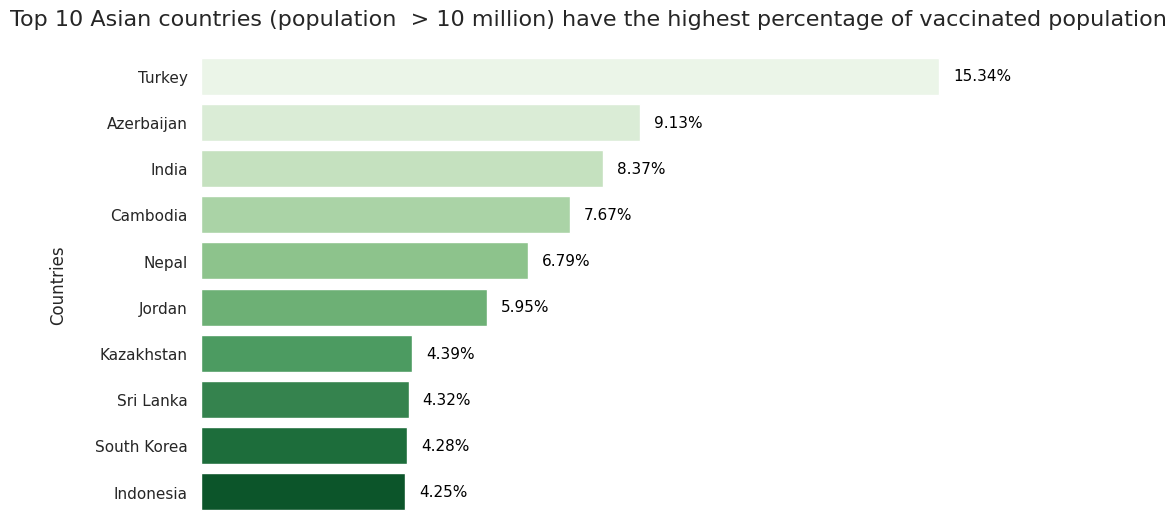

In [ ]:
top_10_percent_population_vaccinated_EU=country_pop_more_than_10m[country_pop_more_than_10m.continent=='Asia'].sort_values(by='percent_population_vaccinated', ascending=False).head(10)

sns.set_theme(style='white')
f, ax = plt.subplots(figsize=(10, 6))
ax= sns.barplot(x='percent_population_vaccinated' , y='location', data=top_10_percent_population_vaccinated_EU, palette='Greens')
sns.despine(left=True, bottom=True)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)


ax.axes.set_title('Top 10 Asian countries (population  > 10 million) have the highest percentage of vaccinated population',fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Countries',fontsize=12, labelpad=20)

#set annotation
for p in ax.patches:
    ax.annotate('{:,.2f}%'.format(float(p.get_width())*100), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha='left', va='center', color='black', fontsize=11);


# The top 10 countries in Asia (population > 10 million) have the highest rate of COVID-related population deaths.


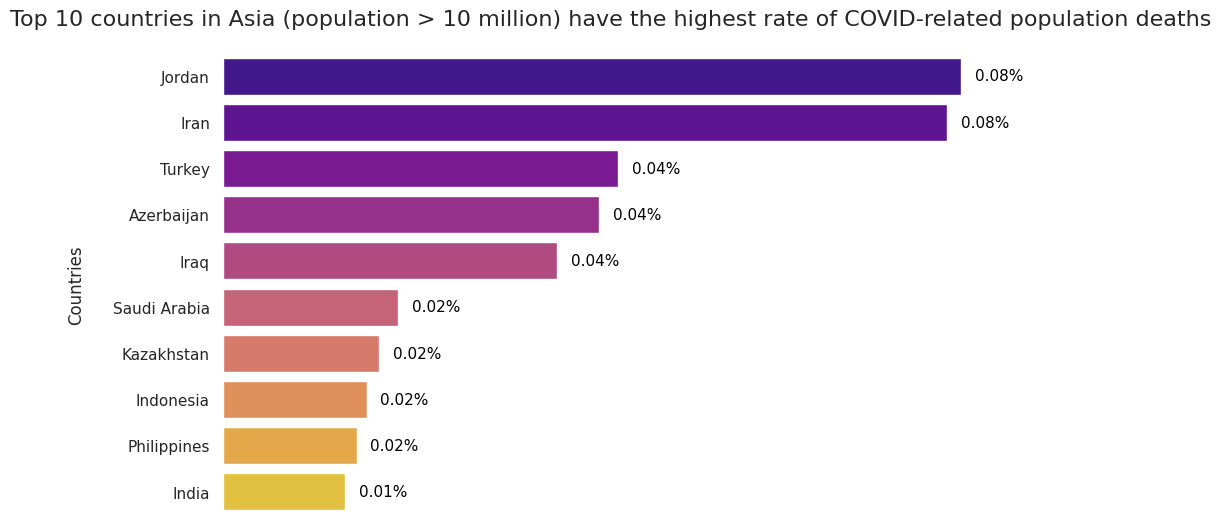

In [ ]:
top_10_percent_population_death_NA=country_pop_more_than_10m[country_pop_more_than_10m.continent=='Asia'].sort_values(by='percent_population_death', ascending=False).head(10)


sns.set_theme(style='white')
f, ax = plt.subplots(figsize=(10, 6))
ax= sns.barplot(x='percent_population_death', y='location', data=top_10_percent_population_death_NA, palette='plasma')
sns.despine(left=True, bottom=True)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)


ax.axes.set_title('Top 10 countries in Asia (population > 10 million) have the highest rate of COVID-related population deaths',fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Countries',fontsize=12, labelpad=20)

#set annotation
for p in ax.patches:
    ax.annotate('{:,.2f}%'.format(float(p.get_width())*100), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha='left', va='center', color='black', fontsize=11);

# Asia Covid Analysis

In [ ]:
Asia_covid=dataframe1[dataframe1.location == 'Asia']
Asia_covid['percent_population_vaccinated'] = Asia_covid.loc[:,'people_vaccinated']/Asia_covid.loc[:,'population']
Asia_covid.head()


<ipython-input-57-a1dec26b9ec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Asia_covid['percent_population_vaccinated'] = Asia_covid.loc[:,'people_vaccinated']/Asia_covid.loc[:,'population']


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,percent_population_vaccinated
3926,OWID_ASI,NaN,Asia,2020-01-22,556.0,0.0,NaN,17.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3927,OWID_ASI,NaN,Asia,2020-01-23,654.0,98.0,NaN,18.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3928,OWID_ASI,NaN,Asia,2020-01-24,937.0,283.0,NaN,26.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,OWID_ASI,NaN,Asia,2020-01-25,1428.0,491.0,NaN,42.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3930,OWID_ASI,NaN,Asia,2020-01-26,2105.0,677.0,NaN,56.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
after_1st_vaccine_date=Asia_covid[Asia_covid.date >'2020-12-14']
lowest_new_cases = after_1st_vaccine_date[after_1st_vaccine_date.new_cases >1].sort_values(by='new_cases').head(1)
lowest_new_cases_date = lowest_new_cases.date
lowest_new_cases_date



4315    2021-02-14
Name: date, dtype: object

In [ ]:
Asia_covid.iloc[-1].to_frame()[2:]

asia_df = dataframe1[dataframe1['continent'] == 'Asia']
asia_df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82849,YEM,Asia,Yemen,2021-04-19,5858.0,46.0,58.857,1132.0,6.0,9.143,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.470
82850,YEM,Asia,Yemen,2021-04-20,5918.0,60.0,58.714,1138.0,6.0,9.286,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.470
82851,YEM,Asia,Yemen,2021-04-21,5960.0,42.0,54.000,1147.0,9.0,9.143,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.470
82852,YEM,Asia,Yemen,2021-04-22,6020.0,60.0,51.857,1157.0,10.0,8.571,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.470


# Group data by year and calculate the total number of COVID-19 cases for each year

In [ ]:
date = asia_df.groupby('date')['total_cases'].sum()
date

date
2020-01-04           0.0
2020-01-05           0.0
2020-01-06           0.0
2020-01-07           0.0
2020-01-08           0.0
                 ...    
2021-04-19    34218377.0
2021-04-20    34666957.0
2021-04-21    35138536.0
2021-04-22    35621280.0
2021-04-23    36102611.0
Name: total_cases, Length: 476, dtype: float64

Create a line chart to show the trend

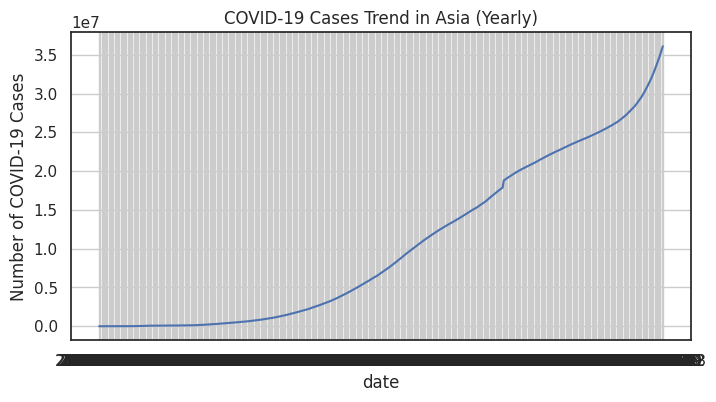

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(date.index, date.values, linestyle='-')
plt.xlabel('date')
plt.ylabel('Number of COVID-19 Cases')
plt.title('COVID-19 Cases Trend in Asia (Yearly)')
plt.grid(True)

# Show the plot
plt.show()


#New deaths time series for Asia Continent

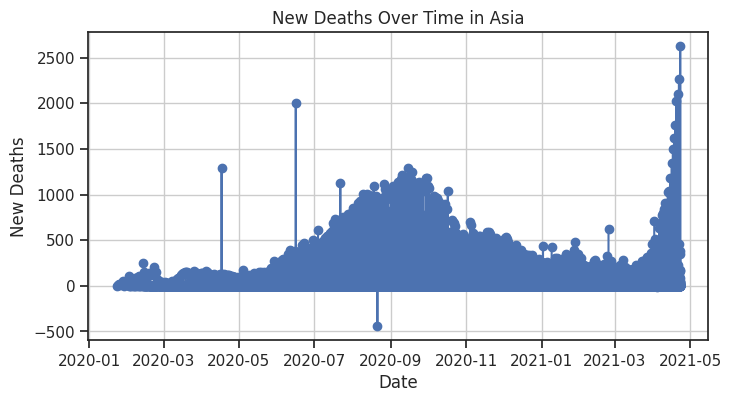

In [ ]:
# #New deaths time series for Asia Continent
dataframe1['date'] = pd.to_datetime(dataframe1['date'])

# Filter data for the 'Asia' continent
asia_df = dataframe1[dataframe1['continent'] == 'Asia']

# Sort the DataFrame by date (if it's not already sorted)
asia_df = asia_df.sort_values(by='date')

# Create a line chart to show the trend of new deaths over time
plt.figure(figsize=(8,4))
plt.plot(asia_df['date'], asia_df['new_deaths'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('New Deaths Over Time in Asia')
plt.grid(True)

# Show the plot
plt.show()
